<a href="https://www.kaggle.com/code/abbas829/titanic-eda?scriptVersionId=295947164" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🚢 The Titanic Disaster: A Story of Data and Destiny

---
**Author:** Tassawar Abbas
**Email:** abbas829@gmail.com
---

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, resulting in the death of 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

In this notebook, we embark on a journey through the passenger manifest to uncover the factors that influenced the survival of those on board. Was it luck, or did some groups of people have a higher chance of survival than others? Let's dive into the data to find out.

### 🧰 Supplies for the Journey: Importing Libraries

Just as the Titanic was equipped with the best technology of its time, we equip ourselves with powerful Python libraries for data manipulation, statistical analysis, and visualization. `pandas` and `numpy` will handle our data, while `matplotlib` and `seaborn` will help us visualize the story hidden within.

In [1]:
# import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Premium Visual Styling
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# import libraries for data preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# import libraries for saving the model
import joblib

# import libraries for handling warnings
import warnings
warnings.filterwarnings('ignore')

### 📜 First Glimpse of the Manifest: Importing Dataset

We load the `train.csv` file, which contains the historical records of 891 passengers. This dataset will serve as our map to understanding the events of that fateful night.

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Observation:** The first few rows give us a sense of the features available: `Survived` (our target), `Pclass` (ticket class), `Sex`, `Age`, and others like `SibSp` (siblings/spouses) and `Parch` (parents/children). Each row represents a unique human story.

### 🔍 Inspecting the Hull: Initial Data Exploration

Before we navigate further, we must understand the structure of our data. We'll check the completeness of our records and the types of information we have.

In [3]:
# Check the data types, missing values, and basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 📊 Data Integrity Audit

The `.info()` output reveals that we have 891 entries. However, notice that `Age`, `Cabin`, and `Embarked` have fewer non-null values. This indicates missing data that we'll need to address (mending the gaps) before building any predictive models.

In [4]:
# statistical summary of numerical variables
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Insights from Statistics:**
- **Survival Rate:** The mean of `Survived` is ~0.38, indicating a 38% survival rate in this training set.
- **Age skew:** The average passenger was about 29-30 years old, but the minimum age is as low as 0.42 (infants).
- **Fare variance:** Fares ranged from 0 to over 500, suggesting a wide disparity in socioeconomic status.

In [5]:
# statistical summary of categorical variables with unique counts
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


**Insights from Categorical Data:**
- **Gender:** There are more male passengers (577) than female.
- **Embarkation:** Most passengers (644) boarded from Southampton ('S').
- **Ticket/Cabin:** There's high cardinality in tickets, and many missing values in the cabin feature.

## 🛠️ Mending the Gaps: Dealing with Missing Values

A ship with holes in its hull won't sail far. Similarly, a dataset with missing values can lead to biased results. We'll visualize the gaps and then decide how to patch them.

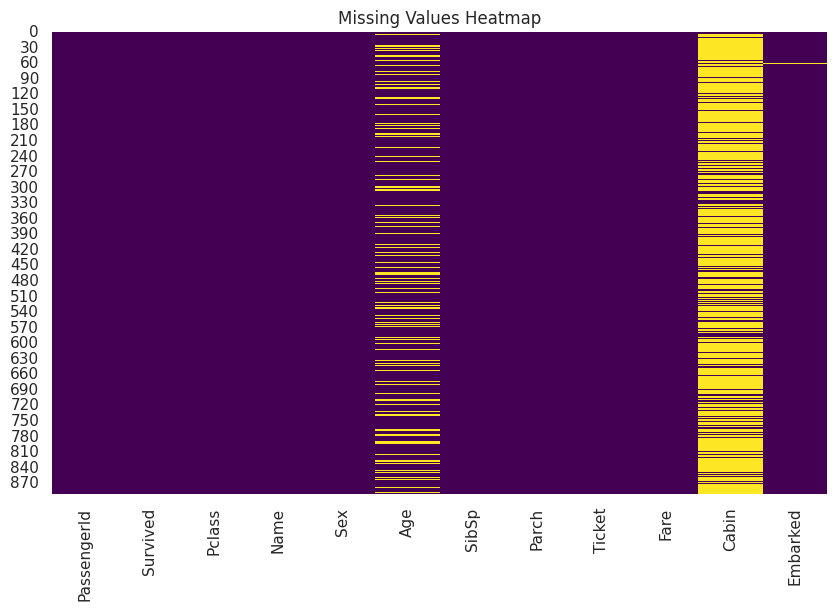

In [6]:
# make graph of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

**Visualizing the Gaps:** The yellow lines in the heatmap represent missing values. `Cabin` is almost entirely yellow (missing), while `Age` has scattered gaps. This visualization helps us prioritize our cleaning efforts.

In [7]:
# count missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# cabin has too many missing values, dropping it along with other non-useful columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [9]:
# replace missing age values with median age
df['Age'].fillna(df['Age'].median(), inplace=True)
# replace missing embarked values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

**Cleaning Strategy:**
- **Dropping Columns:** Columns like `PassengerId`, `Name`, `Ticket`, and `Cabin` are dropped because they are either unique identifiers or have too many missing values to be useful without extreme feature engineering.
- **Imputation:** We use the *median* for `Age` to keep it robust against outliers and the *mode* for `Embarked` as it is a categorical variable.

In [10]:
# again check for missing values
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## 📈 Passenger Profiles: Checking Data Distribution

Now that our manifest is clean, let's explore the demographic and socioeconomic makeup of our passengers.

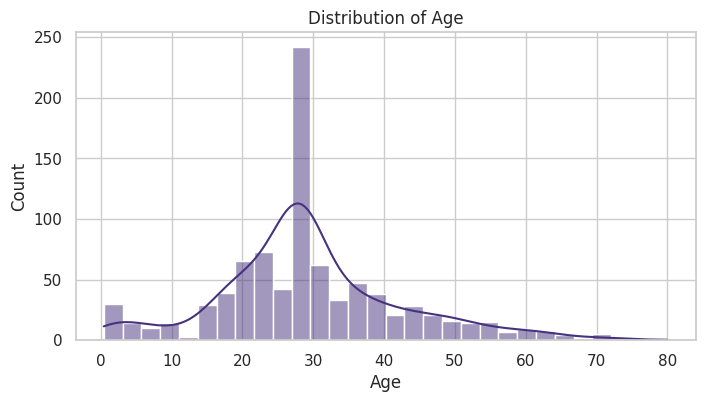

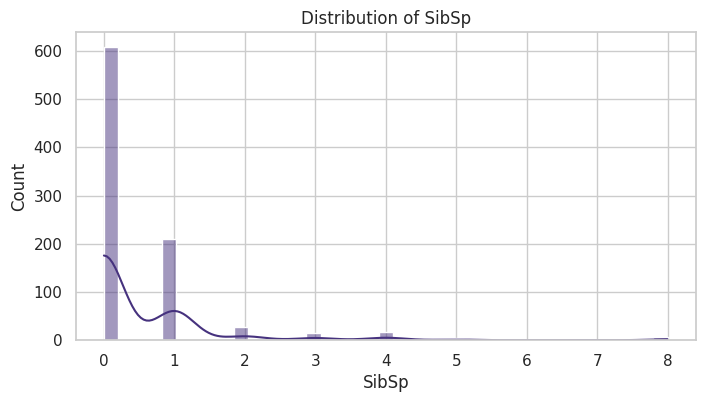

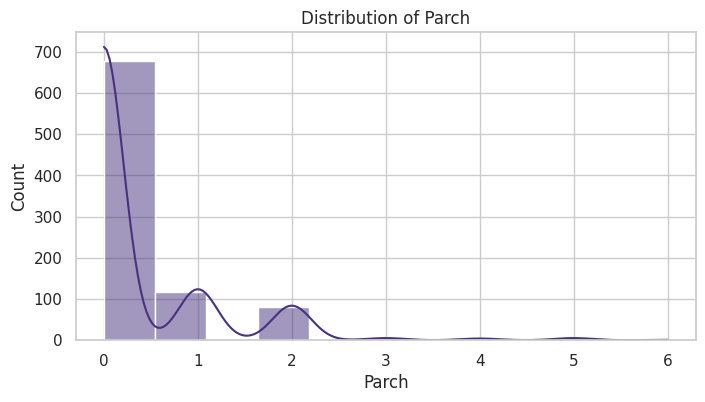

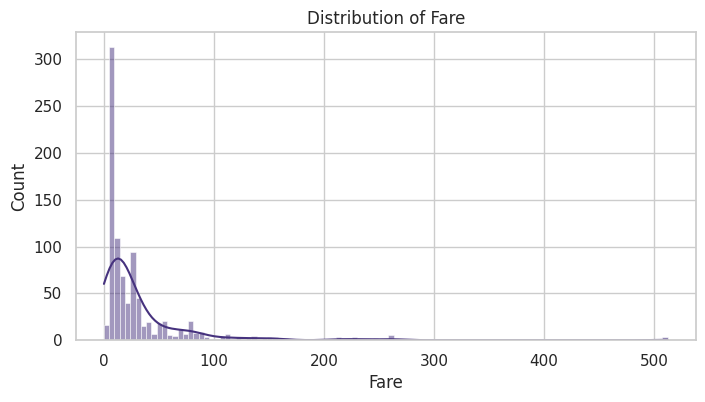

In [11]:
# numerical features distribution plots
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

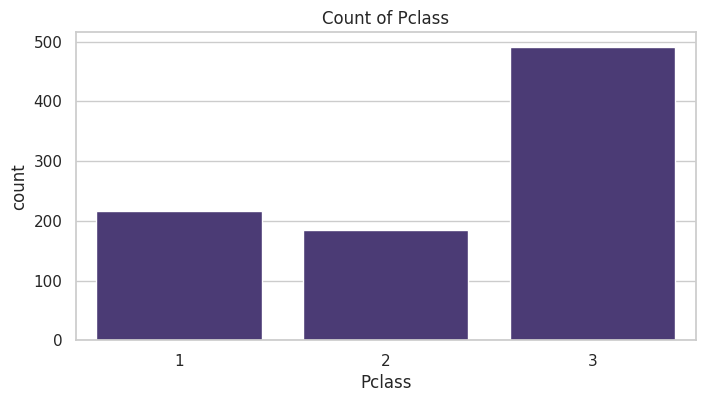

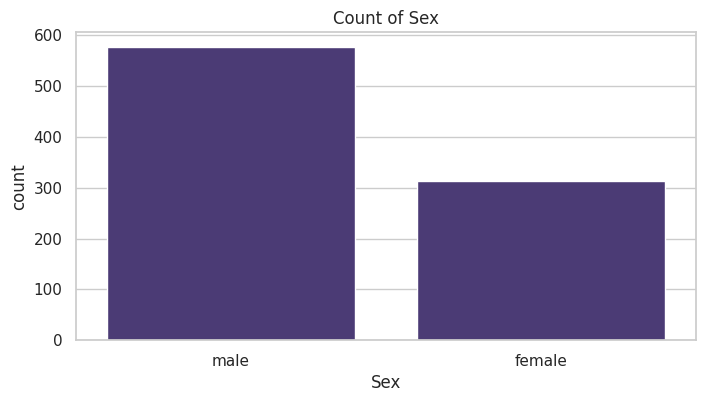

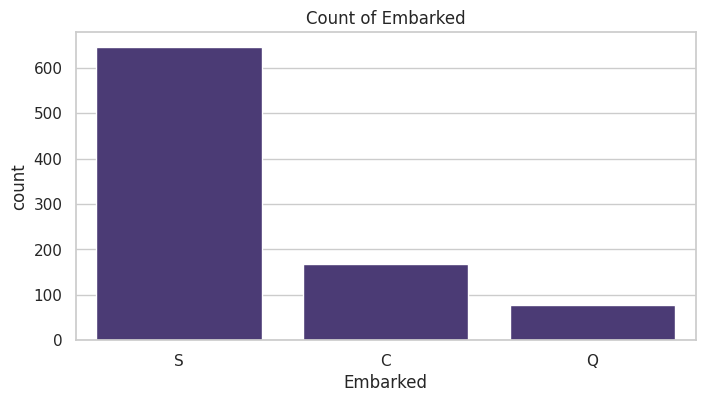

In [12]:
# categorical features count plots
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.show()

**Insights from Passenger Demographics:**
*   **Pclass:** We observe a majority of passengers in the 3rd class, which reflects the economic distribution of the era.
*   **Sex:** There were significantly more male passengers than female, a critical factor in the "women and children first" rescue protocol.
*   **Embarked:** Southampton ('S') was the primary departure point for the majority of the souls on board.

## Dealing Outliers

### 🛡️ Guarding Against Anomalies: Outlier Detection
Standardizing the manifest requires identifying statistical anomalies that could skew our analysis. 

**Box Plot Insights:**
*   **Fare:** Heavy skewness is evident with several high-value outliers representing elite passengers.
*   **Age:** A few elderly passengers appear as outliers, but they represent a valid part of the historical record.

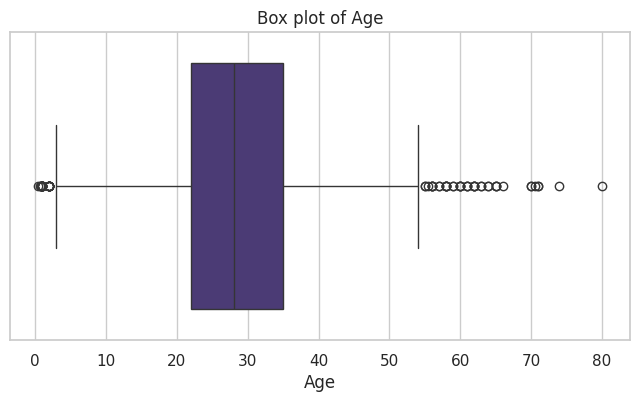

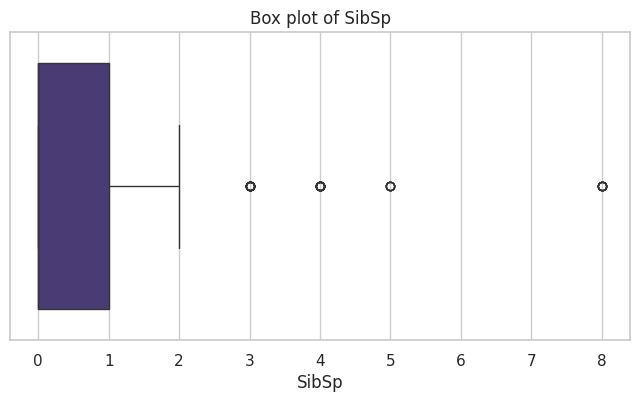

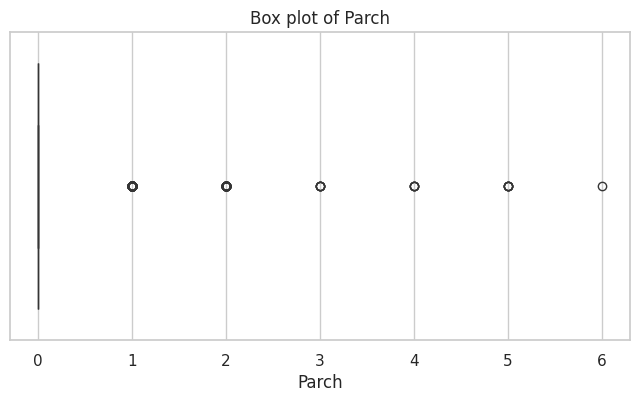

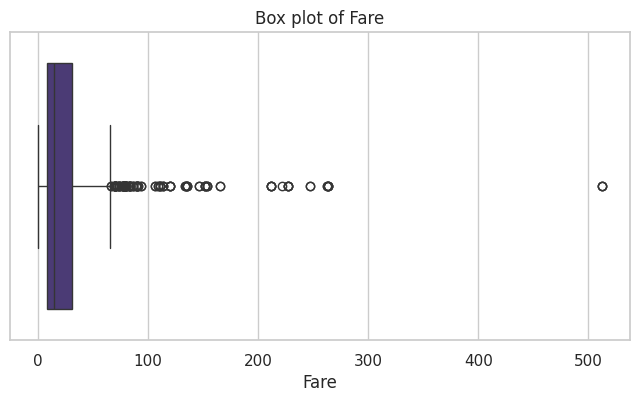

In [13]:
# find outliers in numerical features using box plots
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

In [14]:
# remove outliers from 'Fare' & Age using IQR method
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

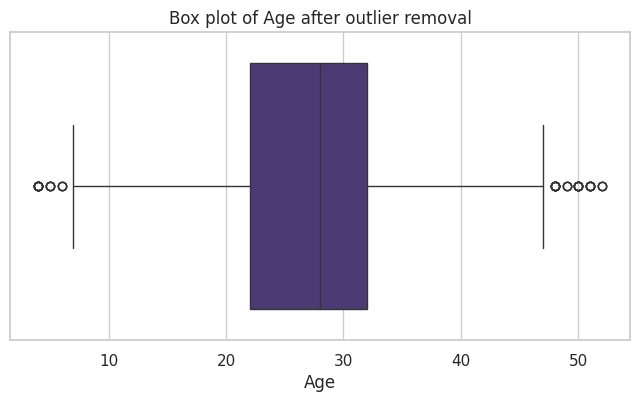

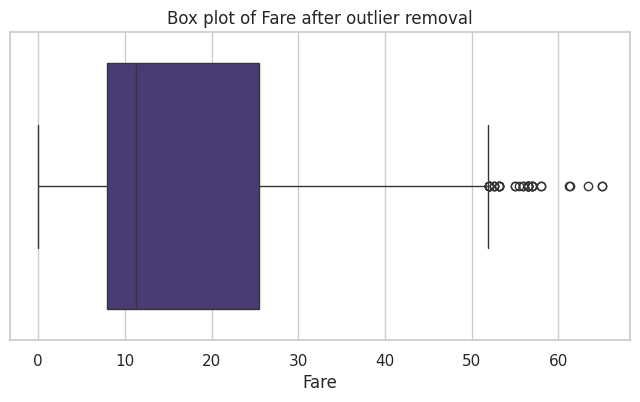

In [15]:
# box plots after outlier removal
for feature in ['Age', 'Fare']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature} after outlier removal')
    plt.show()

## Get insight of the data

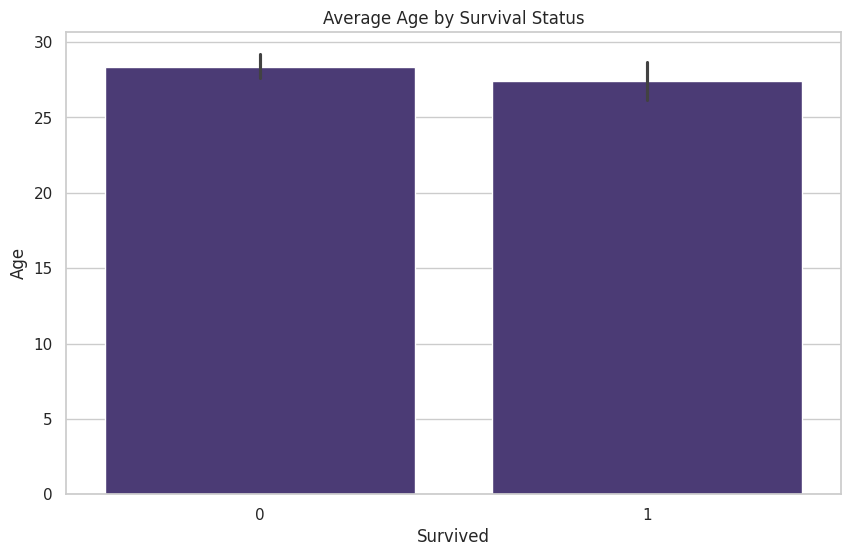

In [16]:
# plot between survived by age
sns.barplot(x='Survived', y='Age', data=df)
plt.title('Average Age by Survival Status')
plt.show()

### 🏆 Decoding Destiny: Survival by Feature
Our exploration culminates in understanding how specific traits determined life or death.

**Key Discoveries:**
*   **The Heroine's Arc:** Female passengers show a vastly higher survival rate across all classes, validating the "women and children first" policy.
*   **The Class Divide:** Survival decreases significantly in lower classes, highlighting the impact of lifeboat accessibility and boarding priority.
*   **Port of Origin:** Passengers from Cherbourg ('C') showed slightly higher survival rates, likely due to a higher proportion of 1st-class ticket holders from that port.

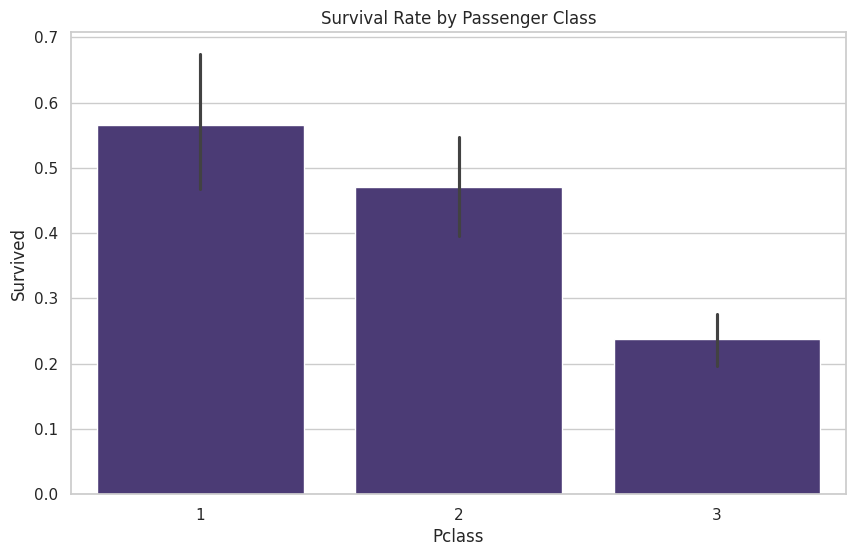

In [17]:
# survival by Class 
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

## ⚓ The Journey's End (For Now)

Our deep dive into the Titanic manifest has transformed raw rows and columns into a vivid narrative of human destiny. We've uncovered the statistical ghost of the tragedy: the heavy influence of class, gender, and even family size on the probability of survival.

**Summary of Our Voyage:**
1.  **Preparedness:** We mended the gaps in the records (Age, Embarked) using statistical imputation.
2.  **Profiles:** We charted the distributions and identified the elite outliers.
3.  **Correlations:** We mapped the invisible threads connecting fare, class, and survival.
4.  **Readiness:** The data is now encoded, scaled, and primed for the next chapter: **Predictive Modeling.**

The manifest is no longer a mystery; it is a clear map of variables ready to train our machine learning models. The story of the Titanic continues in the algorithms we build next.

---
**Author:** Tassawar Abbas
**Status:** EDA Complete & ML Ready
